
Comprehensive analysis of India's electric vehicle market, focusing on segmentation derived from sales data, customer reviews, and technical specifications.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings

In [21]:
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

# Sales Data
The sales data obtained from the Society of Manufacturers of Electric Vehicles, spanning 2017 to 2023, catalogues sales figures of electric two-wheelers, three-wheelers, four-wheelers, and buses. This dataset provides a comprehensive view of market trends and customer preferences over time.

In [22]:
data_smev = pd.read_excel("/content/smev_data.xlsx")

In [23]:
data_smev.keys()

Index(['financial_year', 'maker', 'market_share', 'month', 'num_vehicles'], dtype='object')

In [24]:
print([col for col in data_smev.columns if 'EV' in col or 'Industries' in col])


[]


In [25]:
data_smev.columns = data_smev.columns.str.strip()  # Remove any leading/trailing spaces


In [26]:
# Rename the column if there's a slight difference in name
data_smev.rename(columns={'Actual Column Name': 'EV Industries'}, inplace=True)

In [27]:
# Access the 'EV Industries' column
print(data_smev['maker'])

0     Hero Electric
1     Hero Electric
2     Hero Electric
3     Hero Electric
4     Hero Electric
          ...      
67           Others
68           Others
69           Others
70           Others
71           Others
Name: maker, Length: 72, dtype: object


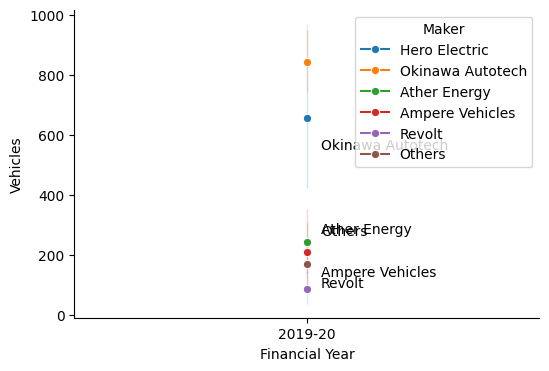

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=data_smev, x='financial_year', y='num_vehicles', hue='maker', marker='o', palette='tab10')

# Label the axes
plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.legend(title='Maker')

# Annotate the last data point for each maker
for maker in data_smev['maker'].unique():
    last_point = data_smev[data_smev['maker'] == maker].iloc[-1]
    plt.annotate(f"{last_point['maker']}",
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5),
                 ha='left')

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

# Show the plot
plt.show()


**Above Figure showcased the remarkable growth trajectory of India's two-wheeler market in 2023, underscoring its leading position within the industry.**

In [29]:
# Sort data_smev by 'market_share' in descending order
data_smev_sorted = data_smev.sort_values('market_share', ascending=False)

# Display sorted data (if needed)
data_smev_sorted.head()


,financial_year,maker,market_share,month,num_vehicles
21,2019-20,Okinawa Autotech,0.38,Jan,715
13,2019-20,Okinawa Autotech,0.38,May,847
23,2019-20,Okinawa Autotech,0.38,Mar,575
22,2019-20,Okinawa Autotech,0.38,Feb,664
20,2019-20,Okinawa Autotech,0.38,Dec,762


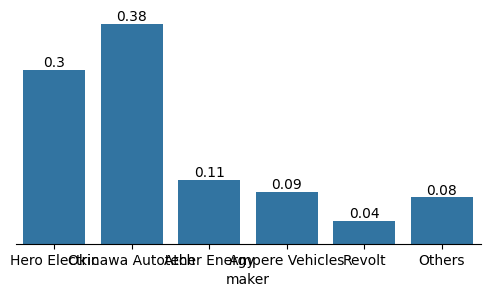

In [30]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 3))
ax = sns.barplot(data=data_smev, x='maker', y='market_share')  # Assuming 'maker' as category and 'market_share' as value

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Customize plot appearance
plt.yticks([])
plt.ylabel("")
ax.spines[['right', 'top', 'left']].set_visible(False)
plt.show()

**Above Figure delved into the market's financial perspective, representing the industry's total value in crores. Notably, two-wheelers emerged as the primary revenue generators, highlighting their economic significance.**

In [31]:
ev2w = list(data_smev.keys())[0:4]
data_ev2w = pd.concat([data_smev[ev2w[0]], data_smev[ev2w[1]], data_smev[ev2w[2]], data_smev[ev2w[3]]])

In [32]:
# Check if data_ev2w is a Series or DataFrame
if isinstance(data_ev2w, pd.Series):
    # Convert Series to DataFrame, assuming each value in Series can be its own column
    data_ev2w = data_ev2w.to_frame()

# After conversion, check column names
print("Columns in data_ev2w:", data_ev2w.columns)

# Now, if 'maker' exists or needs renaming, you can proceed:
# Assuming the column might need renaming from a name like 'Maker ' (with a space at the end)
data_ev2w.rename(columns={'Maker ': 'maker'}, inplace=True)

# Finally, apply the uppercase transformation if 'maker' is a valid column
if 'maker' in data_ev2w.columns:
    data_ev2w['maker'] = data_ev2w['maker'].str.upper()
else:
    print("Column 'maker' not found. Please check the column names.")


Columns in data_ev2w: RangeIndex(start=0, stop=1, step=1)
Column 'maker' not found. Please check the column names.


In [33]:
# Check and print the columns to verify the exact name
print("Columns in data_ev2w:", data_ev2w.columns)

# Rename the column if there is an extra space or typo (adjust the name as per the output)
# For instance, if it is 'Maker ' instead of 'maker'
data_ev2w.rename(columns={'Maker ': 'maker'}, inplace=True)

# Ensure 'maker' column is present before proceeding
if 'maker' in data_ev2w.columns:
    # Sort and get unique values in 'maker'
    sorted_maker_unique = np.sort(data_ev2w['maker'].unique())
    print("Sorted unique values in 'maker':", sorted_maker_unique)
else:
    print("Column 'maker' not found. Please check the column names.")


Columns in data_ev2w: Index([0], dtype='int64')
Column 'maker' not found. Please check the column names.


In [34]:
# Check the type and first few rows of data_ev2w
print(type(data_ev2w))
print(data_ev2w.head())  # Check the content to understand its structure

<class 'pandas.core.frame.DataFrame'>
         0
0  2019-20
1  2019-20
2  2019-20
3  2019-20
4  2019-20


In [36]:
print(data_ev2w.columns)


Index([0], dtype='int64')


In [38]:
# Check column names
print("Columns in data_ev2w:", data_ev2w.columns)

# Try accessing the 'maker' column if it exists
if 'maker' in data_ev2w.columns:
    print(np.sort(data_ev2w['maker'].unique()))
else:
    print("Column 'maker' does not exist in data_ev2w.")


Columns in data_ev2w: Index([0], dtype='int64')
Column 'maker' does not exist in data_ev2w.


In [39]:
np.sort(data_ev2w['maker'].unique())

KeyError: 'maker'

In [40]:
data_ev2w

,0
0,2019-20
1,2019-20
2,2019-20
3,2019-20
4,2019-20
...,...
67,Nov
68,Dec
69,Jan
70,Feb


In [41]:
# Check the column names
print(data_ev2w.columns)

# Ensure that 'financial_year' and 'maker' columns exist
if 'financial_year' in data_ev2w.columns and 'maker' in data_ev2w.columns:
    data_ev2w_year = data_ev2w.groupby(['financial_year', 'maker']).agg({'num_vehicles': 'sum'}).reset_index()
else:
    print("The necessary columns are not in the DataFrame.")


Index([0], dtype='int64')
The necessary columns are not in the DataFrame.


In [45]:
# Check the DataFrame structure
try:
    print(data_ev2w.columns)
except NameError:
    print("The DataFrame 'data_ev2w' is not defined.")


Index([0], dtype='int64')


In [46]:
try:
    print(data_ev2w.head())
except NameError:
    print("The DataFrame 'data_ev2w' is not defined.")


         0
0  2019-20
1  2019-20
2  2019-20
3  2019-20
4  2019-20


In [47]:
data_ev2w = data_ev2w.rename(columns={'Financial_Year': 'financial_year', 'Maker': 'maker', 'Num_Vehicles': 'num_vehicles'})


In [48]:
print(data_ev2w.columns)


Index([0], dtype='int64')


In [50]:
print(data_ev2w.columns)


Index([0], dtype='int64')


In [51]:
print(data_ev2w.head())


         0
0  2019-20
1  2019-20
2  2019-20
3  2019-20
4  2019-20


In [52]:
print(data_ev2w.dtypes)


0    object
dtype: object


In [54]:
print(data_ev2w.columns.tolist())


['index', 0]


In [56]:
print(data_ev2w.columns.tolist())
print(data_ev2w.head())
print(data_ev2w.info())


['index', 0]
   index        0
0      0  2019-20
1      1  2019-20
2      2  2019-20
3      3  2019-20
4      4  2019-20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   288 non-null    int64 
 1   0       288 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.6+ KB
None


Columns in data_ev2w: ['financial_year', 'maker', 'market_share', 'month', 'num_vehicles']
Grouped DataFrame (data_ev2w_year):
  financial_year             maker  num_vehicles
0        2019-20   Ampere Vehicles          2518
1        2019-20      Ather Energy          2905
2        2019-20     Hero Electric          7865
3        2019-20  Okinawa Autotech         10135
4        2019-20            Others          2026


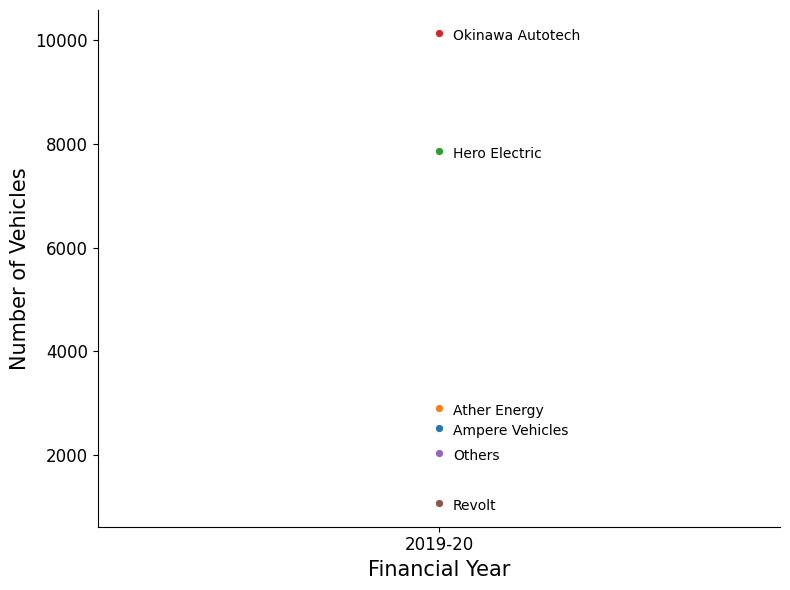

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data_ev2w exists and has the required structure
if 'data_ev2w' not in locals():
    raise ValueError("The DataFrame 'data_ev2w' is not defined. Load or create it first.")

# Confirm the structure of data_ev2w
print("Columns in data_ev2w:", data_ev2w.columns.tolist())
if not all(col in data_ev2w.columns for col in ['financial_year', 'maker', 'num_vehicles']):
    raise ValueError("The DataFrame 'data_ev2w' must contain the columns: 'financial_year', 'maker', and 'num_vehicles'.")

# Create data_ev2w_year
try:
    data_ev2w_year = data_ev2w.groupby(['financial_year', 'maker']).agg({'num_vehicles': 'sum'}).reset_index()
    print("Grouped DataFrame (data_ev2w_year):")
    print(data_ev2w_year.head())
except KeyError as e:
    raise ValueError(f"KeyError during grouping: {e}")

# Plot the data
fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(
    data=data_ev2w_year,
    x='financial_year',
    y='num_vehicles',
    hue='maker',
    marker='o',
    palette='tab10',
    ax=ax
)

# Label the axes
plt.xlabel("Financial Year", fontsize=15)
plt.ylabel("Number of Vehicles", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Maker', fontsize=12)

# Annotate the last data point for each maker
for maker in data_ev2w_year['maker'].unique():
    maker_data = data_ev2w_year[data_ev2w_year['maker'] == maker]
    last_point = maker_data.iloc[-1]
    plt.annotate(
        f"{last_point['maker']}",
        (last_point['financial_year'], last_point['num_vehicles']),
        textcoords="offset points",
        xytext=(10, -5),
        ha='left'
    )

# Hide the top and right spines
ax.spines[['right', 'top']].set_visible(False)

# Hide the legend (optional)
ax.get_legend().set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()


**Above Figure honed in on specific electric two-wheeler companies, with Ola Electric emerging as the market leader in 2023, illustrating industry leadership and market competitiveness.**

In [59]:
print(data_smev.keys())  # Should return the expected columns
print(data_smev.head())  # Inspect the first few rows


Index(['financial_year', 'maker', 'market_share', 'month', 'num_vehicles'], dtype='object')
  financial_year          maker  market_share month  num_vehicles
0        2019-20  Hero Electric           0.3   Apr          1776
1        2019-20  Hero Electric           0.3   May           455
2        2019-20  Hero Electric           0.3   Jun           329
3        2019-20  Hero Electric           0.3   Jul           260
4        2019-20  Hero Electric           0.3   Aug           249


In [61]:
# Group and aggregate as intended
data_ev2w_year = data_ev2w.groupby(['financial_year', 'maker']).agg({'num_vehicles': 'sum'}).reset_index()

# Check the result
print(data_ev2w_year.head())


  financial_year             maker  num_vehicles
0        2019-20   Ampere Vehicles          2518
1        2019-20      Ather Energy          2905
2        2019-20     Hero Electric          7865
3        2019-20  Okinawa Autotech         10135
4        2019-20            Others          2026


# EV Market Segmentation

* The dataset used for the market segmentation analysis, extracted from bikewale.com, comprises electric two-wheeler customer reviews, offering vital behavioral and psychographic insights.
* It also presents detailed technical specifications and pricing information of electric two-wheelers. This data allowed us to assess the technical feasibility and price points crucial for our market segmentation strategy


In [63]:
data_bw = pd.read_csv("/content/ev2_bikewale.csv")
data_model = pd.read_csv("/content/ev_model_spec.csv")

In [64]:
data = data_bw.merge(data_model, how = 'left', on = 'Model Name')

In [65]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


<Axes: >

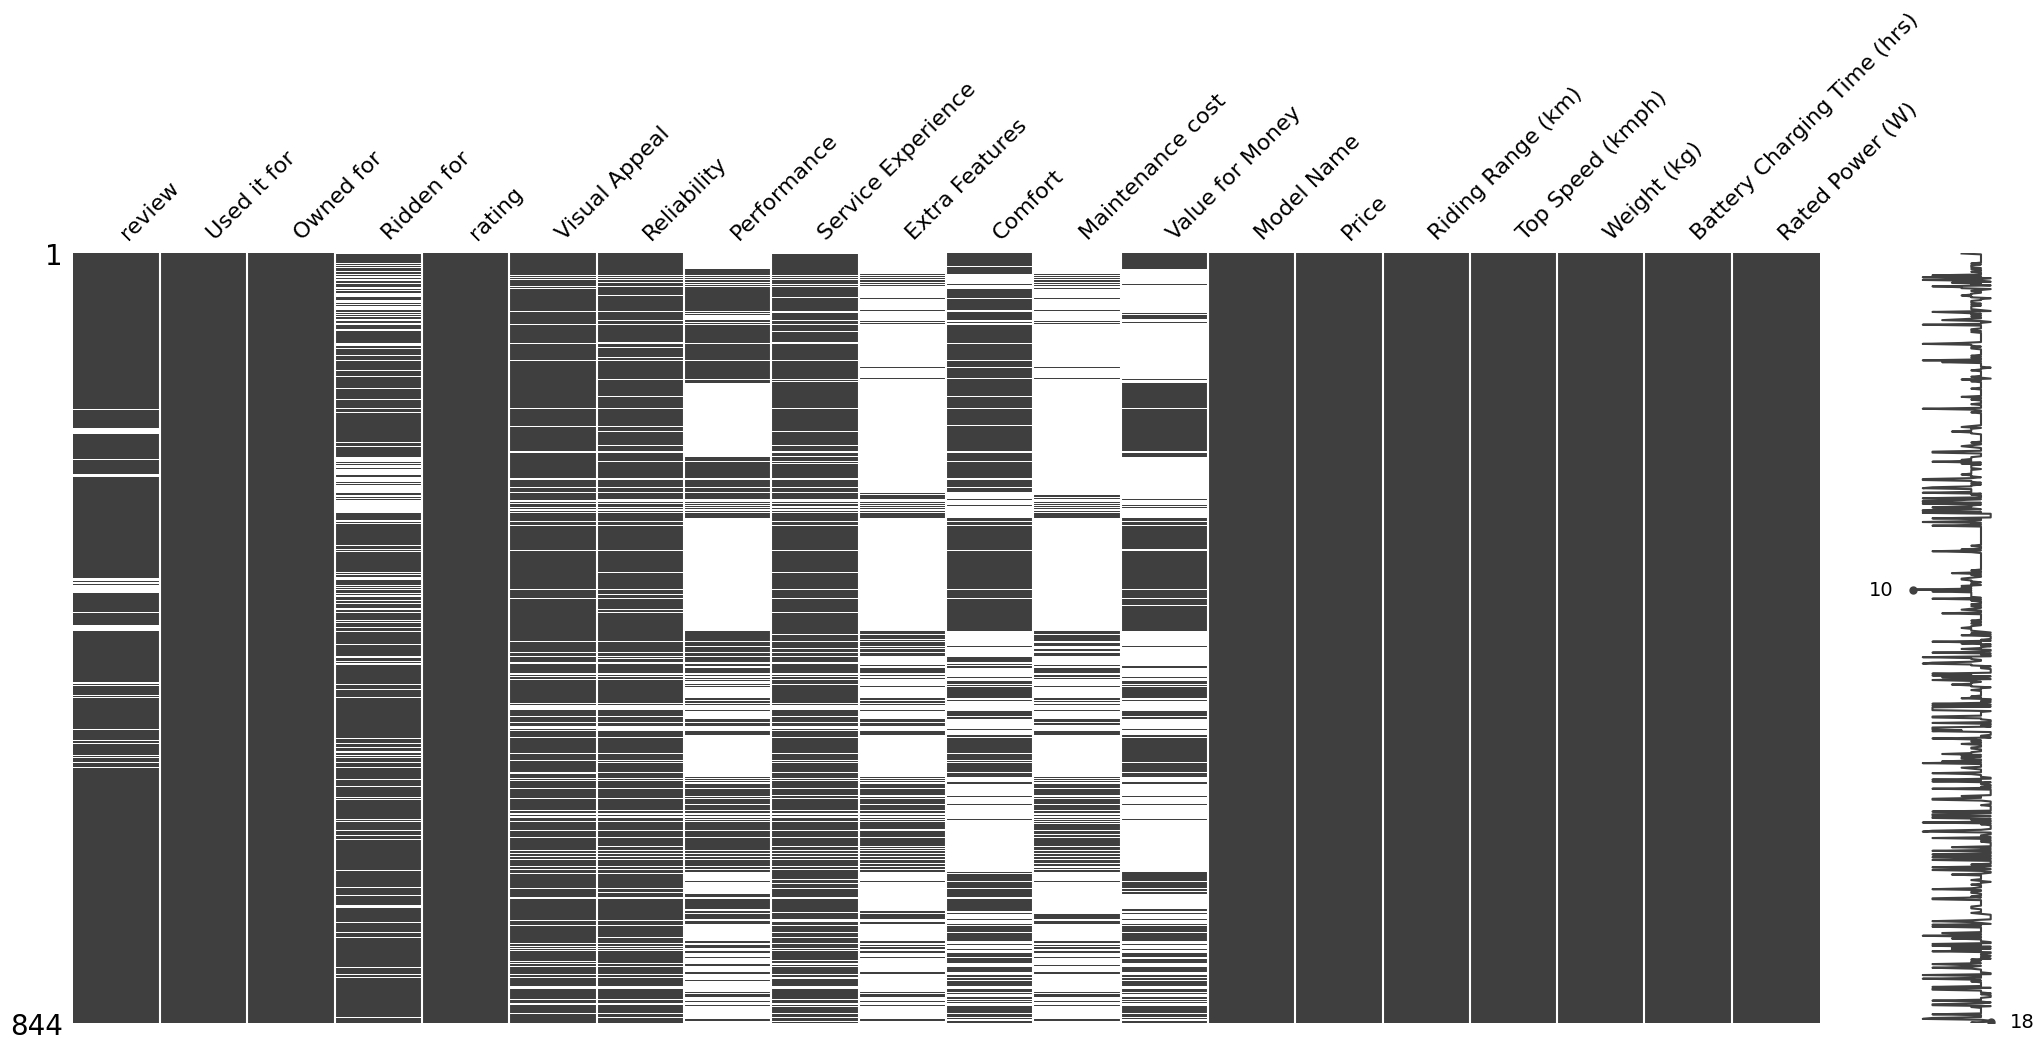

In [66]:
msno.matrix(data)

In [67]:
((data.isnull().sum() * 100/data.shape[0])).sort_values(ascending = False)

,0
Maintenance cost,78.672986
Extra Features,78.080569
Performance,59.123223
Value for Money,53.791469
Comfort,37.203791
Ridden for,20.853081
Service Experience,16.706161
Reliability,15.165877
Visual Appeal,12.440758
review,5.568720


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

In [70]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [71]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Prepare a list for storing sentiment labels
sentiments_list = []

# Analyze sentiment for each review
for review_text in data['review']:
    if pd.isna(review_text):
        sentiments_list.append('neutral')
        continue

    sentiment_scores = sentiments.polarity_scores(review_text)
    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    # Determine sentiment label
    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    sentiments_list.append(sentiment_label)

# Add sentiment results to the DataFrame
data['sentiment'] = sentiments_list


In [72]:
sentiments = SentimentIntensityAnalyzer()
sentiments_list = []

for review_text in data['review']:
    if pd.isna(review_text):
        sentiments_list.append('neutral')
        continue
    sentiment_scores = sentiments.polarity_scores(review_text)

    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    sentiments_list.append(sentiment_label)

data['sentiment'] = sentiments_list

In [73]:
data['sentiment'].value_counts()

,count
sentiment,
positive,527
negative,264
neutral,53


In [74]:
data_segment = data[['Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'sentiment']].copy()

In [75]:
data_segment.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,negative
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,negative
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,positive
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,negative
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,negative


In [76]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative


In [77]:
data_segment = data.iloc[:, 5:13].copy()

In [78]:
data_segment = data_segment.fillna(0.)

In [79]:
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 52.9 KB


In [80]:
data_segment.mean()

,0
Visual Appeal,3.309242
Reliability,2.811611
Performance,1.441943
Service Experience,2.619668
Extra Features,0.643365
Comfort,2.300948
Maintenance cost,0.723934
Value for Money,1.562796


In [81]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)

In [82]:
pca = PCA(random_state = 42)
pca.fit(data_scaled)

PCA(random_state=42)

In [83]:
data_pca = pca.transform(data_scaled)

In [84]:
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data_segment.columns))])

In [85]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.291227,-1.038055,0.354864,0.623469,1.102720,0.169287,0.438012,-0.957827
1,-0.710801,-1.394405,-0.360466,0.621671,-0.320899,0.086053,0.426279,0.149917
2,0.849149,-1.189765,0.167683,0.410898,0.409054,0.191904,0.329993,-0.830738
3,-1.967022,-0.878935,-0.100197,-0.330003,0.075822,-0.069599,-0.013068,-0.011328
4,-0.078940,-1.017161,-0.079210,0.324132,0.961554,-0.005517,0.107260,-0.427972


In [86]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [87]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [88]:
factor_loadings = pd.DataFrame(pca.components_, columns = data_segment.columns, index = df_pca.columns).T

In [89]:
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,0.480170,0.117814,0.063320,0.730598,-0.247014,-0.105903,-0.375474,-0.067539
Reliability,0.494758,0.124910,-0.002776,-0.152447,0.819319,-0.060484,-0.117211,-0.166384
Performance,0.128721,0.459145,0.574833,0.005549,0.019902,0.025704,0.288468,0.598232
Service Experience,0.486499,0.100691,-0.054176,-0.653781,-0.470391,-0.052432,-0.311210,0.044129
Extra Features,0.024373,0.519633,-0.364578,0.023208,-0.116821,-0.559390,0.456829,-0.246323
Comfort,0.418255,-0.304266,0.249807,0.020111,-0.172621,0.296656,0.623271,-0.404238
Maintenance cost,-0.005912,0.513208,-0.386495,0.054822,-0.020302,0.762039,0.003360,-0.055435
Value for Money,0.309572,-0.351548,-0.563840,0.107598,0.046688,-0.009572,0.260855,0.617065


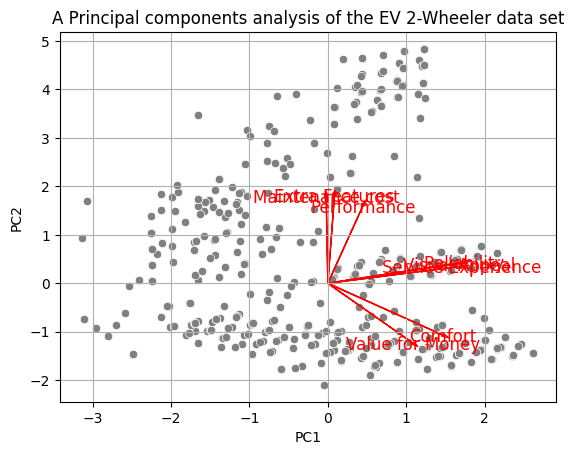

In [90]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
plt.show()

In [91]:
data_km28 = [KMeans(n_clusters = k, random_state = 42).fit(data_scaled) for k in range(2, 9)]

In [92]:
wcss = [model.inertia_ for model in data_km28]

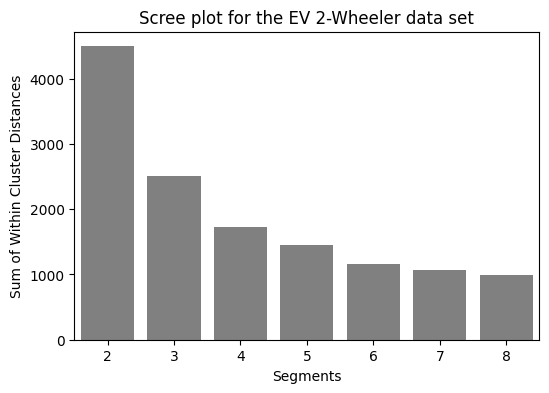

In [93]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = list(range(2, 9)), y = wcss, color = 'grey')
plt.xlabel("Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the EV 2-Wheeler data set")
plt.show()

In [94]:
wcss_diff = pd.DataFrame({'Segments':range(2,9),
                          'WCSS Difference': pd.Series(wcss).diff()})
wcss_diff['WCSS Difference'][0] = 0

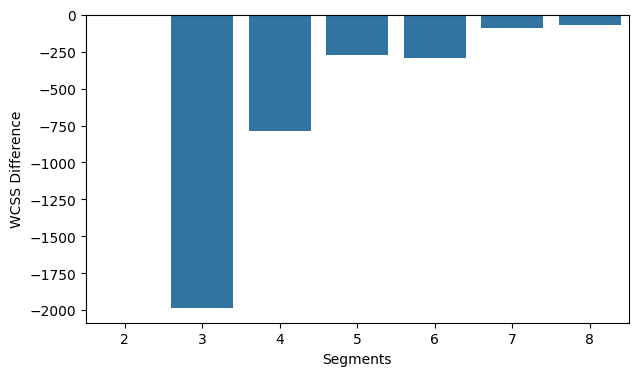

In [95]:
plt.figure(figsize = (7, 4))
sns.barplot(wcss_diff, x = 'Segments', y = 'WCSS Difference')
plt.show()

**The decision-making process was significantly guided by the scree plot above, revealing a distinct elbow at four segments. This marked point indicated a substantial reduction in distances, signifying the optimal number of segments for our analysis.**

In [96]:
kmeans = data_km28[2]

In [97]:
data_clust = pd.DataFrame(data_scaled, columns = data_segment.columns)
data_clust['cluster'] = kmeans.labels_

In [98]:
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_

# Profiling Segments

In [99]:
data_profile = data_segment.copy()
data_profile['cluster'] = kmeans.labels_

In [100]:
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T

In [101]:
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

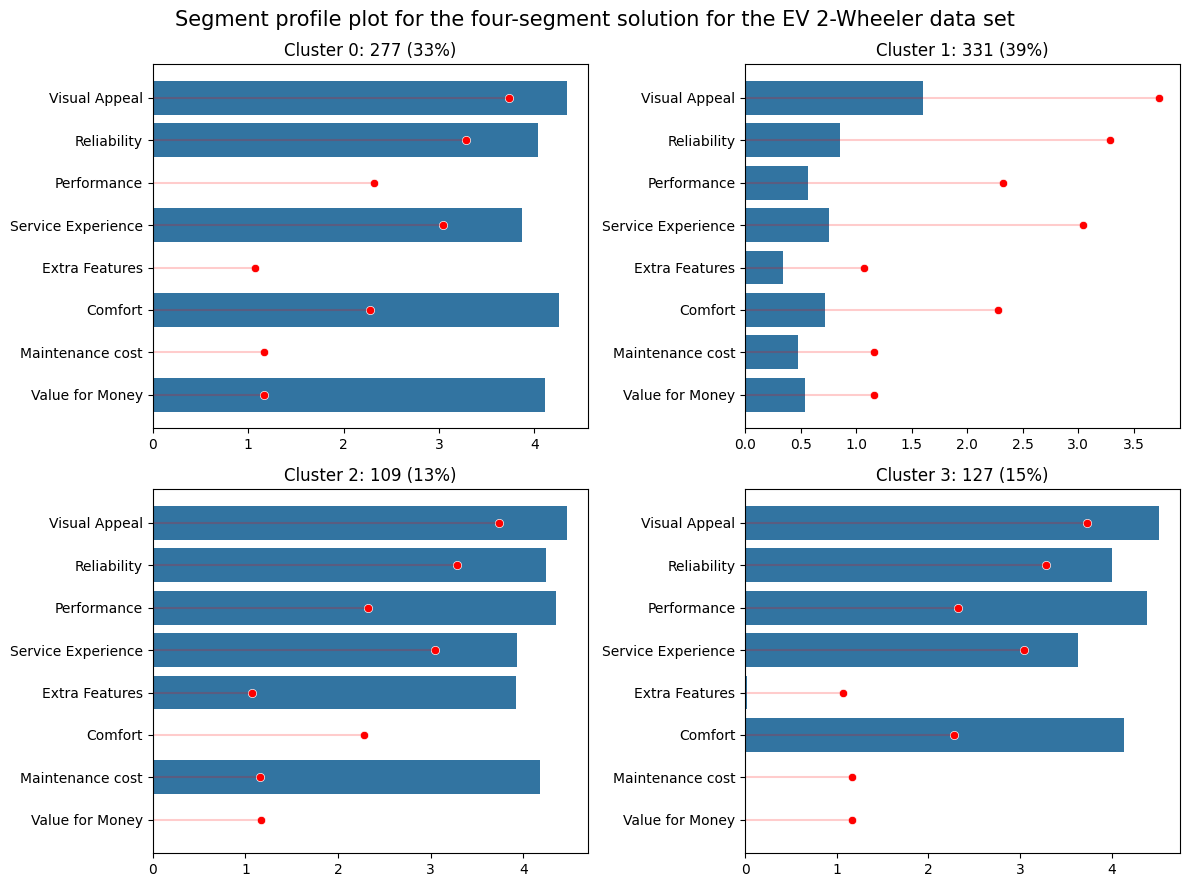

In [102]:
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.show()

**Above graph visually captures the diverse perceptions among different segments. Segment 0, representing 15% of consumers, values the electric two-wheeler vehicle for its visual appeal, reliability, performance, service experience, and comfort. Conversely, Segment 1 (39% of consumers) expresses dissatisfaction across all aspects, marking them as the largest but least satisfied group. Segment 2 (33% of consumers) appreciates visual appeal, reliability, service experience, comfort, and notably, perceives a strong value for money. Lastly, Segment 3 (13% of consumers), the smallest segment, values visual appeal, reliability, performance, service experience, extra features, and maintenance cost, showcasing distinct perceptions, particularly on features and costs.**

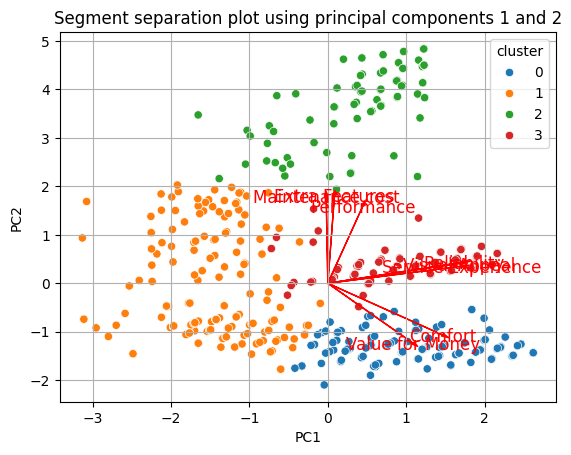

In [103]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'tab10')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.show()

**Above Figure, utilizing principal components, further emphasizes the differences among segments. Notably, Segment 1, despite being the largest segment, lacks specific opinions, making them unique in their lack of satisfaction.**

# Describing Segments

In [104]:
data_desc = data.copy()
data_desc['cluster'] = kmeans.labels_

In [105]:
data_desc.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'sentiment', 'cluster'],
      dtype='object')

In [106]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth = 1, title = "Simple Mosaic Plot", xlabel = 'cat'):

    fig, ax = plt.subplots(figsize =figsize)

    # Convert to ratio of each row sum and do a cumsum along row
    p_cnt_ratio_df = df.div(df.sum(1), axis =0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)

    # Get column order.
    col_order = ratio_cum_df.columns.tolist()

    x = [str(n) for n in ratio_cum_df.index.tolist()]

    # Do the actual plots
    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)

    # Add in legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)


    # Configure title and axis
    plt.title(title)
    plt.xlabel("Segments")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])
    plt.show()


In [107]:
color_list = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F']

In [108]:
sentiment_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['sentiment'])

In [109]:
sentiment_cluster

sentiment,negative,neutral,positive
cluster,,,
0,30,41,206
1,205,8,118
2,16,0,93
3,13,4,110


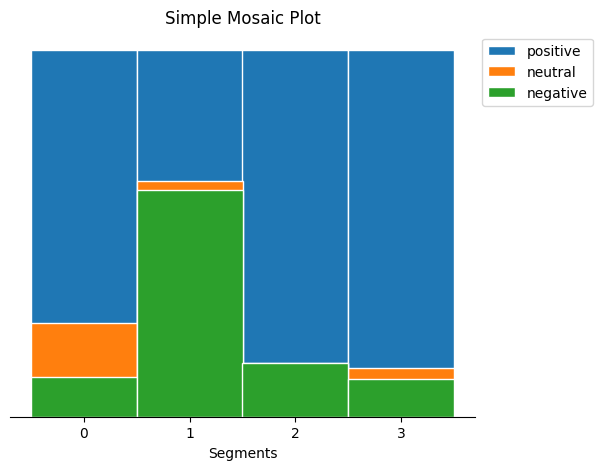

In [110]:
mosaicplot(sentiment_cluster, color_list[:3], figsize=(6,5), barwidth = 1)

**Above mosaic plot, explores consumer sentiments, revealing that all segments, except Segment 1, exhibit positive sentiments. Segment 1 consumers stand out with negative sentiments, indicating dissatisfaction across various aspects.**

In [111]:
used_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Used it for'])

In [112]:
used_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
cluster,,,,,
0,194,55,7,19,2
1,245,47,7,27,5
2,86,19,2,1,1
3,75,39,4,9,0


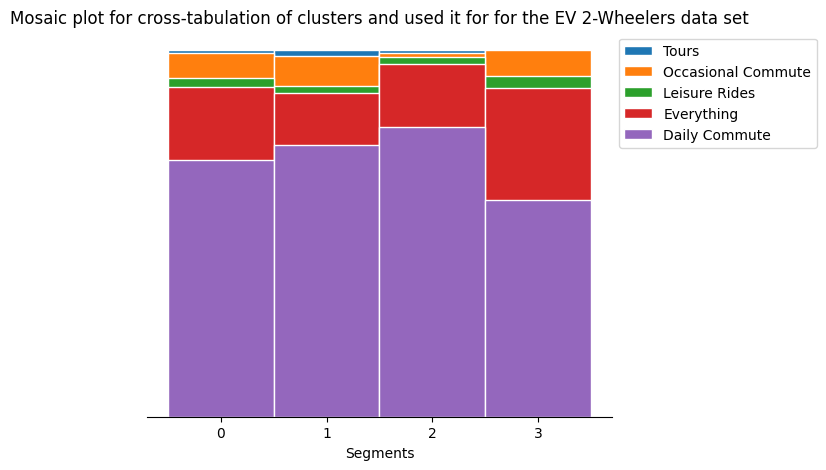

In [113]:
mosaicplot(used_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and used it for for the EV 2-Wheelers data set' )

**Above mosaic plot illustrates that all segments predominantly use electric vehicles for daily commuting, with limited usage for tours, occasional commuting, and leisure rides.**

In [114]:
owned_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Owned for'])

In [115]:
owned_cluster

Owned for,3-6 months,6 months-1 yr,< 3 months,> 1 yr,Never owned,Occasional Commute
cluster,,,,,,
0,41,51,79,56,50,0
1,40,56,67,117,50,1
2,14,13,43,20,19,0
3,16,14,31,10,56,0


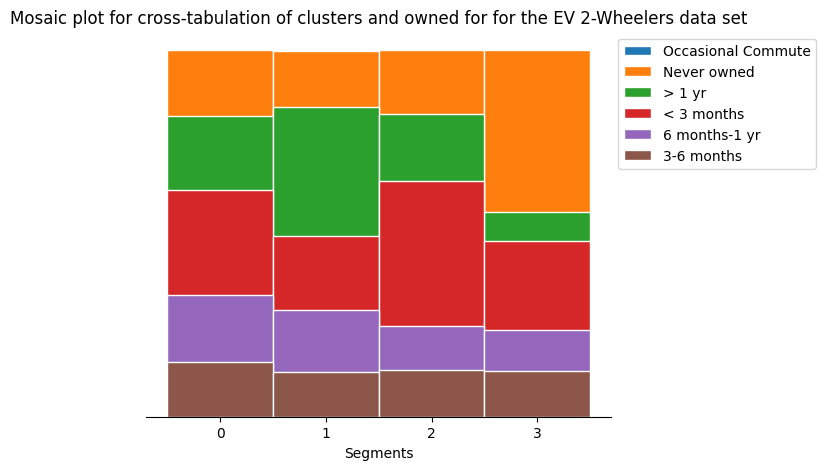

In [116]:
mosaicplot(owned_cluster, color_list[:6], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and owned for for the EV 2-Wheelers data set' )

**Above mosaic plot delineates the ownership duration of electric vehicles among segments. Segment 1 stands out, owning electric vehicles for more than a year, while Segment 0 has no prior ownership experience. Segment 2 members moderately own vehicles ranging from less than 3 months to over a year, and Segment 3 consumers have owned electric vehicles for a few days to less than 3 months.**

In [117]:
ridden_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Ridden for'])

In [118]:
ridden_cluster

Ridden for,10000-15000 kms,5000-10000 kms,< 5000 kms,> 15000 kms,Never owned
cluster,,,,,
0,11,44,158,14,0
1,15,61,185,18,1
2,5,18,62,5,0
3,1,15,54,1,0


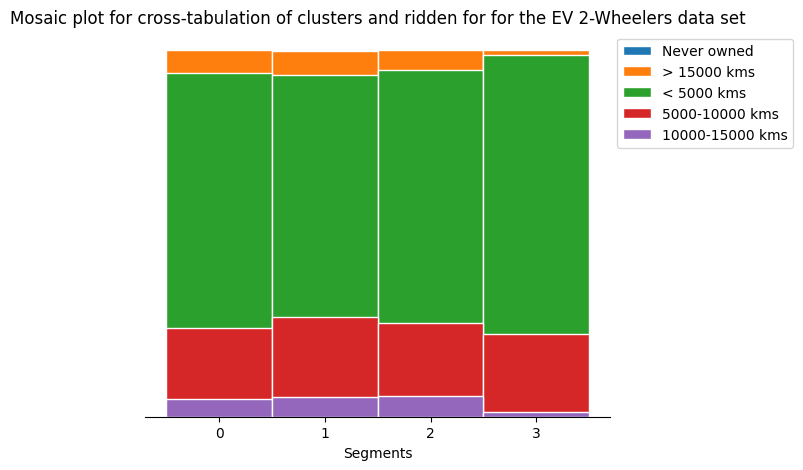

In [119]:
mosaicplot(ridden_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and ridden for for the EV 2-Wheelers data set' )

**Above mosaic plot delves into the distances covered by consumers, indicating that all segments predominantly use electric vehicles for commuting, with most users covering distances below 5000 kms. A small portion falls in the 5000 to 10000 kms range, aligning with their commuting needs.**

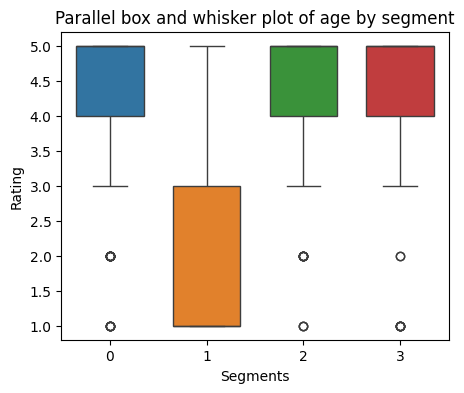

In [120]:
# Number of cluster along the x-axis and rating along the y-axis
plt.figure(figsize = (5,4))
sns.boxplot(data_desc, x= 'cluster', y = 'rating', palette = 'tab10', width = 0.7)
plt.xlabel("Segments")
plt.ylabel("Rating")
plt.title("Parallel box and whisker plot of age by segment")
plt.savefig("rating.png")
plt.show()

**Above parallel box and whisker plot, emphasizes significant differences in average ratings among segments. Specifically, Segment 1 consumers express dissatisfaction across all perceptions, leading to lower overall ratings.**

In [121]:
data_desc.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment,cluster
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative,1
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative,1
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive,0
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative,1
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative,0


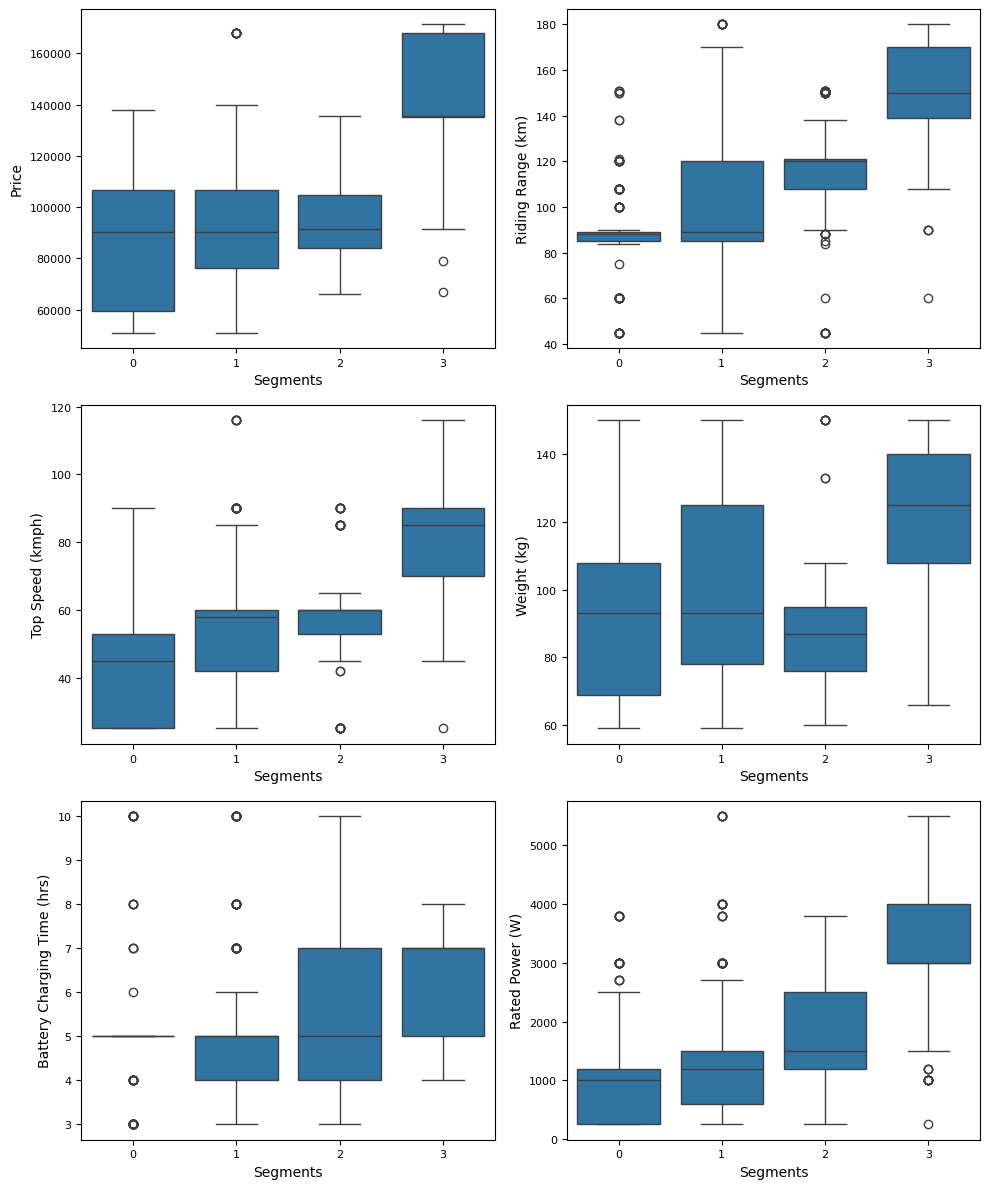

In [122]:
plt.figure(figsize = (10, 12))
for i, col in enumerate(data_desc.columns[-8:-2]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data_desc, x = 'cluster', y =col)
    plt.xlabel("Segments", fontsize= 10)
    plt.ylabel(col, fontsize = 10)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

**In analyzing technical specification of electric vehicles across different segments, distinct patterns emerge. Segment 0 prefers premium EVs with a higher price range and extended riding range, emphasizing consumer preference for luxury and long-distance travel. Segment 1 focuses on budget-friendly options with lower prices and moderate riding ranges, suitable for daily commuting. Segment 2 and Segment 3 prioritize affordability, with slight differences in riding range and speed preferences. Weight preferences vary, with Segment 0 and Segment 1 favoring heavier vehicles, while Segment 2 and Segment 3 prefer lighter options. Charging time also differs, with Segment 0 and Segment 3 opting for longer durations for overnight charging, while Segment 1 and Segment 2 prioritize faster charging for quick turnaround times. These nuanced preferences shape the electric vehicle market in India.**

# Selection of Target Segment

The strategic target segments for the electric vehicle market are identified as Segment 1 (39% of consumers) and Segment 2 (33% of consumers). Segment 1's diverse preferences and dissatisfaction points present an opportunity for improving customer satisfaction and loyalty by directly addressing their specific demands. Segment 2 values visual appeal, reliability, service experience, and comfort, offering a chance to customize electric vehicles to meet these expectations and emphasize value for money. The strategy involves addressing dissatisfaction points in Segment 1 and enhancing positive elements in Segment 2, aligning electric vehicles with the distinct expectations of each segment to ensure competitive advantage and sustained market growth.

# Customizing the Marketing Mix


In our electric vehicle market strategy, customization of the marketing mix is crucial for appealing to Segment 1 and Segment 2, our target segments.
* Product customization involves enhancing features based on specific desires, addressing dissatisfaction points for Segment 1, and emphasizing visual appeal and value for money for Segment 2. Diverse offerings cater to varied tastes and budgets within each segment.
* Price customization includes competitive pricing for Segment 1 and a slightly higher price point for value-added features in Segment 2.
* Promotion customization focuses on targeted advertising and tailored promotional events for each segment's preferences.
* Place customization establishes accessible distribution channels in urban areas for Segment 1 and suburban/semi-urban regions for Segment 2, with a strong emphasis on online presence and customer support.
* People and Process Customization involves training customer service representatives to address segment-specific concerns and ensuring efficient processes for customization requests and service appointments.
This tailored approach ensures our electric vehicles align with the distinct needs of Segment 1 and Segment 2, enhancing market relevance and customer preference.

# Potential Early Market Customer Base

In the analysis of the early market customer base, two primary segments are identified: Segment 1 with 330 members (39% of consumers) and Segment 2 with 277 members (33% of consumers). The target price range for Segment 1 falls between ₹51,094 and ₹1,67,844, and for Segment 2, it ranges from ₹51,094 to ₹1,37,890. By multiplying the number of potential customers in each segment by the targeted price range, potential profits can be calculated. For example, with a target price of ₹1,20,000 for Segment 1, the potential profit amounts to ₹39.60 crores, and for Segment 2 with a target price of ₹1,10,000, the potential profit is ₹30.47 crores. Segment 1, being larger in potential market share, is the primary focus for early market penetration efforts due to its significant profit opportunity.

# Most Optimal Market Segments


After thorough analysis and evaluation, Segment 1, constituting 39% of consumers, has been identified as the optimal market segment for electric two-wheeler vehicles. With a significant customer base and a balanced blend of technical specifications and price range, this segment offers substantial market potential. The recommended technical specifications for Segment 1 include a price range of ₹70,688 to ₹1,29,063, riding range of 89 to 180 km, top speed of 58 to 116 kmph, weight of 76 to 120 kg, battery charging time of 3 to 5 hours, and rated power of 1200 to 5500 W. This targeted approach ensures alignment with the diverse needs and preferences of the market, laying the foundation for a successful and sustainable venture into the electric vehicle market.

# Conclusion

In summary, our in-depth analysis of India's electric vehicle market led us to identify Segment 1 as the optimal target. With a significant 39% consumer base, this segment represents a substantial market opportunity. By tailoring our electric two-wheeler specifications to meet the preferences of this segment, we ensure our products align seamlessly with the demands of a large customer base. This strategic decision is grounded in a thorough understanding of market segmentation, consumer behavior, and technical specifications.
These insights provide a clear direction for our market entry, emphasizing precision and relevance in both product development and marketing strategies. Moving forward, this approach equips us with a solid foundation, ensuring our offerings resonate effectively within India's evolving electric vehicle landscape.